# NHS Tie-Decay
This notebook illustrates how to use the tie-decay code to load a temporal network dataset and analyze it.

In [1]:
import networkx as nx
import numpy as np
import operator
import pandas as pd
import pickle

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2
from tiedecay.construct import TieDecayNetwork
from tiedecay.dataset import Dataset

In [5]:
data_path = '../saved_data/NHSadjList.pkl'
users_path = '../saved_data/NHSUsersDict.pkl'

def open_file(file_path):
    with open(file_path, 'rb') as f:
        loaded = pickle.load(f)
    return loaded

raw_data, user_mapping = [open_file(data_path), open_file(users_path)]

In [6]:
dataset = Dataset(raw_data, user_mapping)

# half-life of one day
alpha = np.log(2)/24/3600
tdn = TieDecayNetwork(dataset, alpha=alpha)

  0%|          | 591/181123 [00:00<00:30, 5905.85it/s]

Sorting data...
Data sorted!
Converting to dictionary...


100%|██████████| 181123/181123 [00:19<00:00, 9524.44it/s] 

Done.


In [7]:
print(f"There are {dataset.num_interactions} interactions between {dataset.num_active_nodes} out of {dataset.num_nodes} total users.")

There are 181123 interactions between 6866 out of 10000 total users.


## Compute tie-decay graph at a given time

In [8]:
print(f'First time: {dataset.t_first}')
print(f'Last time: {dataset.t_last}')

First time: 2012-03-05 20:41:46
Last time: 2012-08-21 09:09:25


In [9]:
t_select = '2012-06-01 00:00:00'

In [10]:
%%time
B_t = tdn.compute_from_dataset(t_select)

CPU times: user 4.89 s, sys: 37.9 ms, total: 4.92 s
Wall time: 4.94 s


In [11]:
# top 10 nodes by Tie-Decay PageRank at `t_select`
top_10_users = sorted(nx.pagerank(B_t).items(), key=operator.itemgetter(1), reverse=True)[:10]
top_10_users = [(dataset.node_mapping[x], y) for x,y in top_10_users]
top_10_users

[('DrEoinClarke', 0.03488304921961217),
 ('UNISONNews', 0.022027615494192323),
 ('cpeedell', 0.01886850730093457),
 ('marcuschown', 0.01829971817038913),
 ('HSJEditor', 0.012573633772413956),
 ('PeteDeveson', 0.009318647917471546),
 ('NottsTUC', 0.00927316433662939),
 ('andyburnhammp', 0.008886730251067648),
 ('HPIAndyCowper', 0.008319353420206916),
 ('mellojonny', 0.008259652601786599)]

## Compute tie-decay centrality trajectories
Performant way of calculating centrality values sampled at equal intervals.

In [12]:
centrality_df = tdn.compute_centrality_trajectories_from_dataset(1000, 'pagerank')

/Users/walid/Desktop/Network-Analysis/TieDecayBetter/tiedecay/construct.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_init["weight"] = 1.0
  2%|▏         | 24/1001 [00:02<01:56,  8.40it/s]/Users/walid/Desktop/Network-Analysis/TieDecayBetter/tiedecay/construct.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weight"] = df.apply(
/Users/walid/miniconda3/envs/tiedecay_env/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [13]:
centrality_df.head()

,2012-03-06 00:44:26,2012-03-06 04:47:06,2012-03-06 08:49:46,2012-03-06 12:52:26,2012-03-06 16:55:06,2012-03-06 20:57:46,2012-03-07 01:00:26,2012-03-07 05:03:06,2012-03-07 09:05:46,2012-03-07 13:08:26,...,2012-08-19 20:44:26,2012-08-20 00:47:06,2012-08-20 04:49:46,2012-08-20 08:52:26,2012-08-20 12:55:06,2012-08-20 16:57:46,2012-08-20 21:00:26,2012-08-21 01:03:06,2012-08-21 05:05:46,2012-08-21 09:08:26
1567,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,...,0.000104,0.000104,0.000109,0.000109,0.000109,0.000110,0.000111,0.000110,0.000111,0.000111
4771,0.000185,0.000185,0.000185,0.000185,0.000185,0.000185,0.000185,0.000185,0.000185,0.000185,...,0.009645,0.010112,0.010456,0.010250,0.009462,0.009071,0.010016,0.021044,0.020343,0.023460
0,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,...,0.000056,0.000056,0.000059,0.000059,0.000059,0.000059,0.000060,0.000060,0.000060,0.000060
1,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,...,0.000366,0.000361,0.000332,0.000334,0.000344,0.000351,0.000338,0.000339,0.000341,0.000205
2,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,...,0.000056,0.000056,0.000059,0.000059,0.000059,0.000059,0.000060,0.000060,0.000060,0.000060


Text(0, 0.5, 'DrEoinClarke')

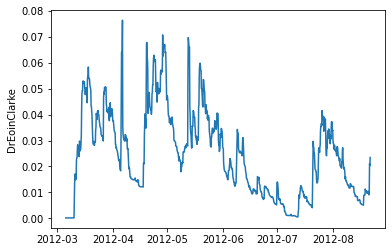

In [19]:
plot_df = centrality_df.sort_values(by=centrality_df.columns[-1], ascending=False)
sns.lineplot(x=plot_df.columns, y=plot_df.iloc[0,:])
plt.ylabel(dataset.node_mapping[plot_df.iloc[0].name])